In [6]:
import project_utils as u
import os
import matplotlib.pyplot as plt
import pandas as pd

COST_REPORT_PATH = './data/cost_report/'

TAX_YEAR = 2022
MIN_HOSPITAL_REV = 250_000_000
MAX_HOSPITAL_REV = 500_000_000
CMS_YEAR = 2022
CMS_DATASET_ID = f"hospitals_10_2022"
CMS_URL = f'https://data.cms.gov/provider-data/sites/default/files/archive/Hospitals/{CMS_YEAR}/{CMS_DATASET_ID}.zip'
CMS_ZIP_PATH = f"./load/hospitals/"
CMS_EXTRACT_PATH = f"data/hospitals/"

INCENTIVE_PERC_LIMIT = None # 1000000000000

cms_root_path = u.get_cms_data(CMS_URL, CMS_ZIP_PATH, CMS_EXTRACT_PATH, CMS_DATASET_ID)

./load/hospitals/hospitals_10_2022.zip already exists. Skipping download
unzipping ./load/hospitals/hospitals_10_2022.zip to data/hospitals/...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:01<00:00, 73.26it/s]


In [2]:
columns = {
    'Facility ID - HCAHPS': 'Facility ID',
    'Facility Name - HCAHPS': 'Facility Name',
    'Region Unencoded': 'Region',
    'health_sys_id': 'health_sys_id',
    'health_system_size': 'health_system_size',
    'ein - 990': "EIN",
    'is_teaching_hospital - cost report': 'is_teaching_hospital',
    'incentive_perc - 990': 'incentive_perc',
    'Number of Beds - cost report': 'Number of Beds',
    'op_margin - 990': 'Operating Margin',

    'Overall hospital rating - linear mean score: HCAHPS Linear Mean Value - HCAHPS': 'Overall Linear Mean HCAHPS Hospital Rating',
    "Death rate for CABG surgery patients: Score - complications and mortality report": "CABG Death Rate Score",
    "Death rate for COPD patients: Score - complications and mortality report": "COPD Death Rate Score",
    "Death rate for heart attack patients: Score - complications and mortality report": "Heart Attack Death Rate Score",
    "Death rate for heart failure patients: Score - complications and mortality report": "Heart Failure Death Rate Score",
    "Death rate for stroke patients: Score - complications and mortality report": "Stroke Death Rate Score",
    "Rate of complications for hip/knee replacement patients: Score - complications and mortality report": "Rate of Complications of Hip or Knee Replacement Score",
    
    
}

bins = [0, 1, 2, 3, 4, 5]
merged = u.join_datasets(TAX_YEAR, 
                       MIN_HOSPITAL_REV,
                       MAX_HOSPITAL_REV,
                       cms_root_path,
                       COST_REPORT_PATH,
                       columns = columns,
                       incentive_perc_limit = INCENTIVE_PERC_LIMIT,
                       opts = {
                           'region_pivot': 'Region',
                           'healthcare_system_pivot': True,
                           'healthcare_system_bins': bins
                       })

print("num records = ", len(merged))
merged.head()

{'region_pivot': 'Region', 'healthcare_system_pivot': True, 'healthcare_system_bins': [0, 1, 2, 3, 4, 5]}


/workspace/project_utils.py:408: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  hcahps = pd.read_csv(os.path.join(cms_root_path, 'HCAHPS-Hospital.csv'))


num records =  84


,Facility ID,Facility ID,Facility Name,Facility Name,Region,health_sys_id,health_system_size,EIN,is_teaching_hospital,incentive_perc,...,CABG Death Rate Score,COPD Death Rate Score,Heart Attack Death Rate Score,Heart Failure Death Rate Score,Stroke Death Rate Score,Rate of Complications of Hip or Knee Replacement Score,Region_Northeast,Region_Region Not Found,Region_South,Region_West
0,110032,110032,STEPHENS COUNTY HOSPITAL,STEPHENS COUNTY HOSPITAL,South,Not in a Hospital System,0.0,586001667,0,25.690371,...,NaN,7.6,NaN,11.4,NaN,NaN,0,0,1,0
1,110135,110135,TAYLOR REGIONAL HOSPITAL,TAYLOR REGIONAL HOSPITAL,South,Not in a Hospital System,0.0,580655369,0,0.000000,...,NaN,9.7,NaN,10.6,NaN,NaN,0,0,1,0
2,111327,111327,BACON COUNTY HOSPITAL,BACON COUNTY HOSPITAL,South,Not in a Hospital System,0.0,582224545,0,21.015258,...,NaN,8.8,NaN,NaN,NaN,NaN,0,0,1,0
3,131302,131302,NORTH CANYON MEDICAL CENTER,NORTH CANYON MEDICAL CENTER,West,Not in a Hospital System,0.0,261938641,0,4.677815,...,NaN,NaN,NaN,12.2,NaN,NaN,0,0,0,1
4,140068,140068,ROSELAND COMMUNITY HOSPITAL,ROSELAND COMMUNITY HOSPITAL,Midwest,Not in a Hospital System,0.0,361703630,0,0.000000,...,NaN,7.7,NaN,10.3,NaN,NaN,0,0,0,0


## Histograms

(array([29.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

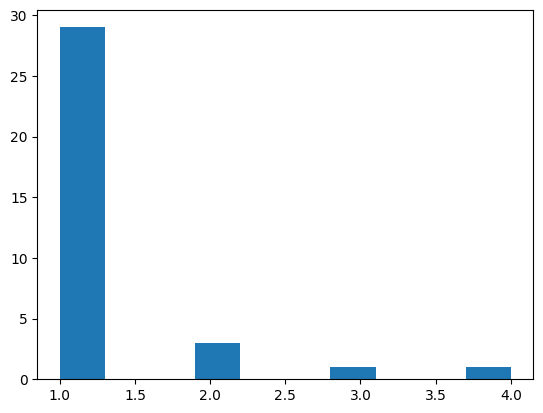

In [3]:

plt.hist(merged[merged['health_sys_id'] != 'Not in a Hospital System']['health_sys_id'].value_counts())

(array([61.,  7.,  5.,  3.,  3.,  1.,  0.,  3.,  0.,  1.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. ]),
 <BarContainer object of 10 artists>)

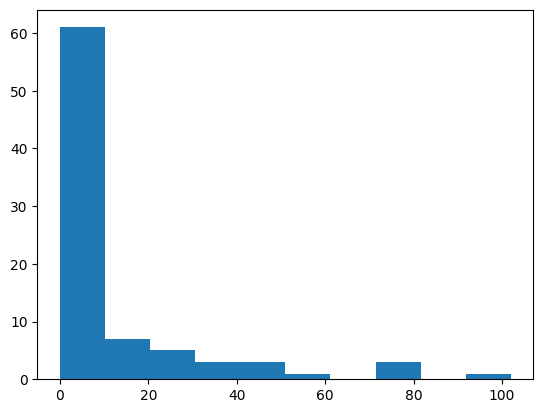

In [4]:

plt.hist(merged['health_system_size'])

/tmp/ipykernel_3208/535865384.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


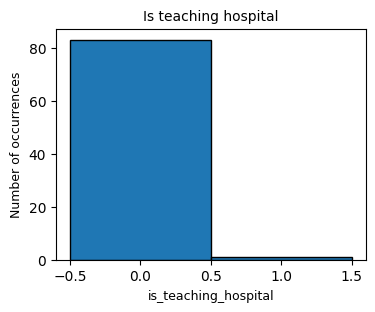

/tmp/ipykernel_3208/535865384.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")


<Figure size 640x480 with 0 Axes>

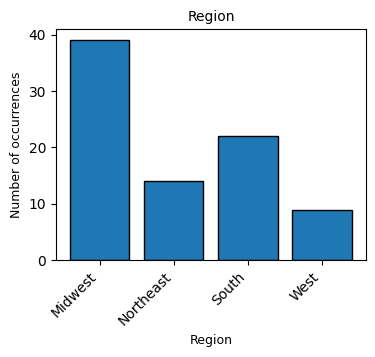

/tmp/ipykernel_3208/535865384.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


<Figure size 640x480 with 0 Axes>

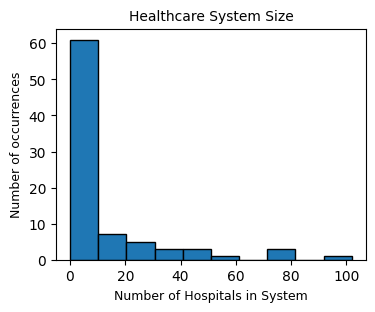

<Figure size 640x480 with 0 Axes>

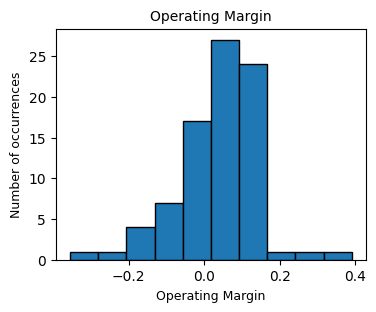

/tmp/ipykernel_3208/535865384.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
/tmp/ipykernel_3208/535865384.py:15: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):


<Figure size 640x480 with 0 Axes>

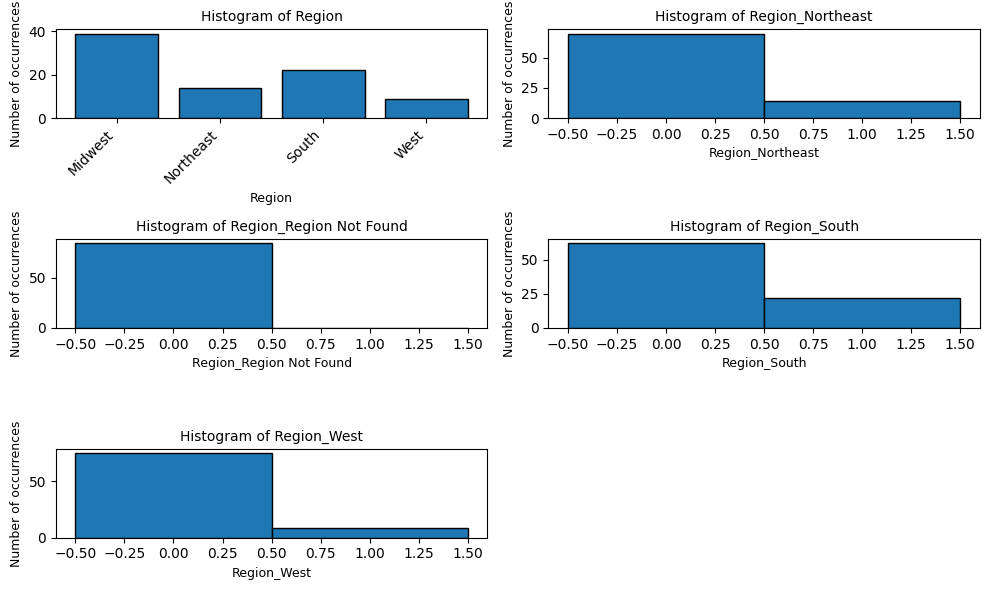

<Figure size 640x480 with 0 Axes>

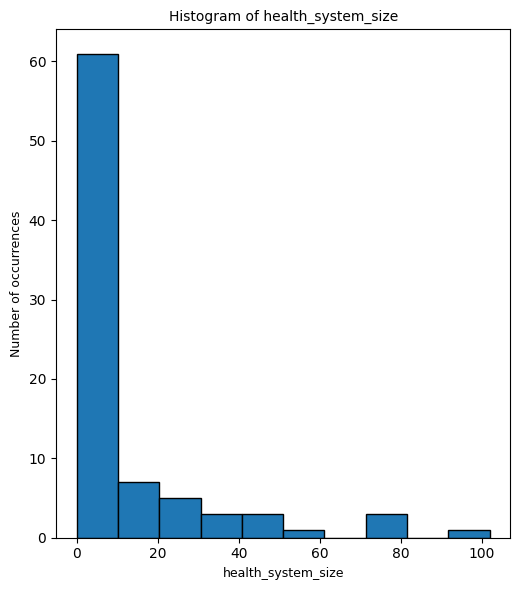

<Figure size 640x480 with 0 Axes>

In [8]:

import math
import matplotlib.pyplot as plt
import numpy as np


def plot_hist(ax, series, title=None, xlabel=None, ylabel="Number of occurrences", bins=None, color=None):
    """
    Draw a histogram or bar plot for a pandas Series.
    - Numeric: histogram (with smart binning for binary/integers).
    - Categorical/string: bar chart from value_counts.
    """
    data = series.dropna()

    # Handle categorical / string columns
    if pd.api.types.is_categorical_dtype(data) or pd.api.types.is_object_dtype(data):
        counts = data.value_counts().sort_index()
        ax.bar(counts.index.astype(str), counts.values, color=color, edgecolor="black")
        ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right")
    else:
        if bins is None:
            uniq = np.unique(data)
            if set(uniq).issubset({0, 1}):
                bins = [-0.5, 0.5, 1.5]
            elif len(uniq) <= 10 and np.all(np.equal(np.mod(uniq, 1), 0)):
                minv, maxv = int(np.nanmin(uniq)), int(np.nanmax(uniq))
                bins = np.arange(minv - 0.5, maxv + 1.5, 1.0)
            else:
                bins = 10
        ax.hist(data, bins=bins, edgecolor="black", color=color)

    if title:
        ax.set_title(title, fontsize=10)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=9)
    ax.set_ylabel(ylabel, fontsize=9)
    
def plot_grid(df, cols, ncols=2, figsize=None, sharex=False, sharey=False, color=None):
    """
    Plot a grid of histograms for columns in `cols` (list of column names).
    ncols = number of columns in the grid.
    """
    if len(cols) == 0:
        raise ValueError("No columns to plot")

    n = len(cols)
    nrows = math.ceil(n / ncols)
    if figsize is None:
        figsize = (5 * ncols, 3.5 * nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False,
                             sharex=sharex, sharey=sharey)
    axes_flat = axes.flatten()

    for ax in axes_flat[n:]:
        ax.set_visible(False)

    for ax, col in zip(axes_flat, cols):
        title = f"Histogram of {col}"
        # pick bins for dummies automatically in plot_hist
        plot_hist(ax, df[col], title=title, xlabel=col, color=color)

    plt.tight_layout()
    return fig, axes


# --- Usage examples ---

# 1) Single plot for binary 'is_teaching_hospital'
fig, ax = plt.subplots(figsize=(4,3))
plot_hist(ax, merged['is_teaching_hospital'].astype(float), title='Is teaching hospital', xlabel='is_teaching_hospital')
plt.show()
plt.savefig(f"EDA/Is teaching hospital histogram - tax year {TAX_YEAR}")

fig, ax = plt.subplots(figsize=(4,3))
plot_hist(ax, merged['Region'], title='Region', xlabel='Region')
plt.show()
plt.savefig(f"EDA/Region histogram - tax year {TAX_YEAR}")

fig, ax = plt.subplots(figsize=(4,3))
plot_hist(ax, merged['health_system_size'], 
          title='Healthcare System Size', 
          xlabel='Number of Hospitals in System')
plt.show()
plt.savefig(f"EDA/Healthcare system size - tax year {TAX_YEAR}")

fig, ax = plt.subplots(figsize=(4,3))
plot_hist(ax, merged['Operating Margin'], 
          title='Operating Margin', 
          xlabel='Operating Margin')
plt.show()
plt.savefig(f"EDA/Operating Revenue - tax year {TAX_YEAR}")

# 2) Region dummy columns (detect robustly)
region_cols = [c for c in merged.columns if c.startswith('Region') or 'Region_' in c or c.startswith('Region_')]
# # If you used get_dummies on column named 'Region', pandas usually creates 'Region_<value>' or 'Region_<value>' (exact varies).
# # The above tries to catch typical variants.
if region_cols:
    fig, axes = plot_grid(merged, sorted(region_cols), ncols=2, figsize=(10, 6))
    plt.show()
    plt.savefig(f"EDA/Region cols grid - tax year {TAX_YEAR}")
else:
    print("No region columns found; check column names with: ", [c for c in merged.columns if 'Region' in c])


# # 3) Health system size dummy columns
# detect columns produced by get_dummies for health system size — they often start with 'health_system_size' or include that substring
health_sys_cols = [c for c in merged.columns if c.startswith('health_system_size') or 'health_system_size' in c]
if health_sys_cols:
    fig, axes = plot_grid(merged, sorted(health_sys_cols), ncols=2, figsize=(10, 4 + 2*math.ceil(len(health_sys_cols)/2)))
    plt.show()
    plt.savefig(f"EDA/Healthcare system size grid - tax year {TAX_YEAR}")
else:
    print("No health system size dummy columns found; inspect merged.columns for patterns.")

## Outliers

In [9]:

merged.sort_values(by = 'incentive_perc', ascending=False)[['Facility ID', 'Facility Name', 'EIN', 'incentive_perc']]

,Facility ID,Facility ID,Facility Name,Facility Name,EIN,incentive_perc
50,301301,301301,COTTAGE HOSPITAL,COTTAGE HOSPITAL,20223321,7529.845714
35,241369,241369,UNITED HOSPITAL DISTRICT,UNITED HOSPITAL DISTRICT,454165628,5075.880785
14,161359,161359,BURGESS HEALTH CENTER,BURGESS HEALTH CENTER,420859940,370.500620
30,231303,231303,SCHOOLCRAFT MEMORIAL HOSPITAL,SCHOOLCRAFT MEMORIAL HOSPITAL,742517055,303.418607
72,461302,461302,MOAB REGIONAL HOSPITAL,MOAB REGIONAL HOSPITAL,870543342,215.527800
...,...,...,...,...,...,...
41,271316,271316,FRANCES MAHON DEACONESS HOSPITAL,FRANCES MAHON DEACONESS HOSPITAL,810231786,0.000000
65,391314,391314,TITUSVILLE HOSPITAL,TITUSVILLE HOSPITAL,250965579,0.000000
52,321308,321308,CIBOLA GENERAL HOSPITAL,CIBOLA GENERAL HOSPITAL,850141285,0.000000
69,440007,440007,UNITY MEDICAL CENTER,UNITY MEDICAL CENTER,825388429,0.000000
